In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
#Cargando el archivo con los ID de las estaciones en México de HadISD
esta=pd.read_fwf("ID.txt",header=None)

In [9]:
# Subtrayendo los años y los datos que tiene la variable TW,max en listas
anios=[]
value=[]
estacion=[]
for i in esta[1]:
    datos=xr.open_dataset(f"/home/jovyan/Tesis/HadISD/estadísticos/{i}99999_estadisticos.nc")
    for ii,jj in enumerate((datos["Twmax"].resample(time="YE").mean()-273.15).dropna("time").time.dt.year): #Seleecionando datos anuales
        anios.append(jj)
        estacion.append(i)
    for iii,jjj in enumerate((datos["Twmax"].resample(time="YE").mean()-273.15).dropna("time")):
        value.append(jjj)
  

In [10]:
#Contando las veces que se repite cada año, lo que equivale al número de estaciones por año
cuenta=[]
for i in range(1973,2024,1):
    cuenta.append(anios.count(i))
    
#Contando el número de observaciones por año
observaciones=estda.groupby(estda.time.dt.year).count().sum("estacion")

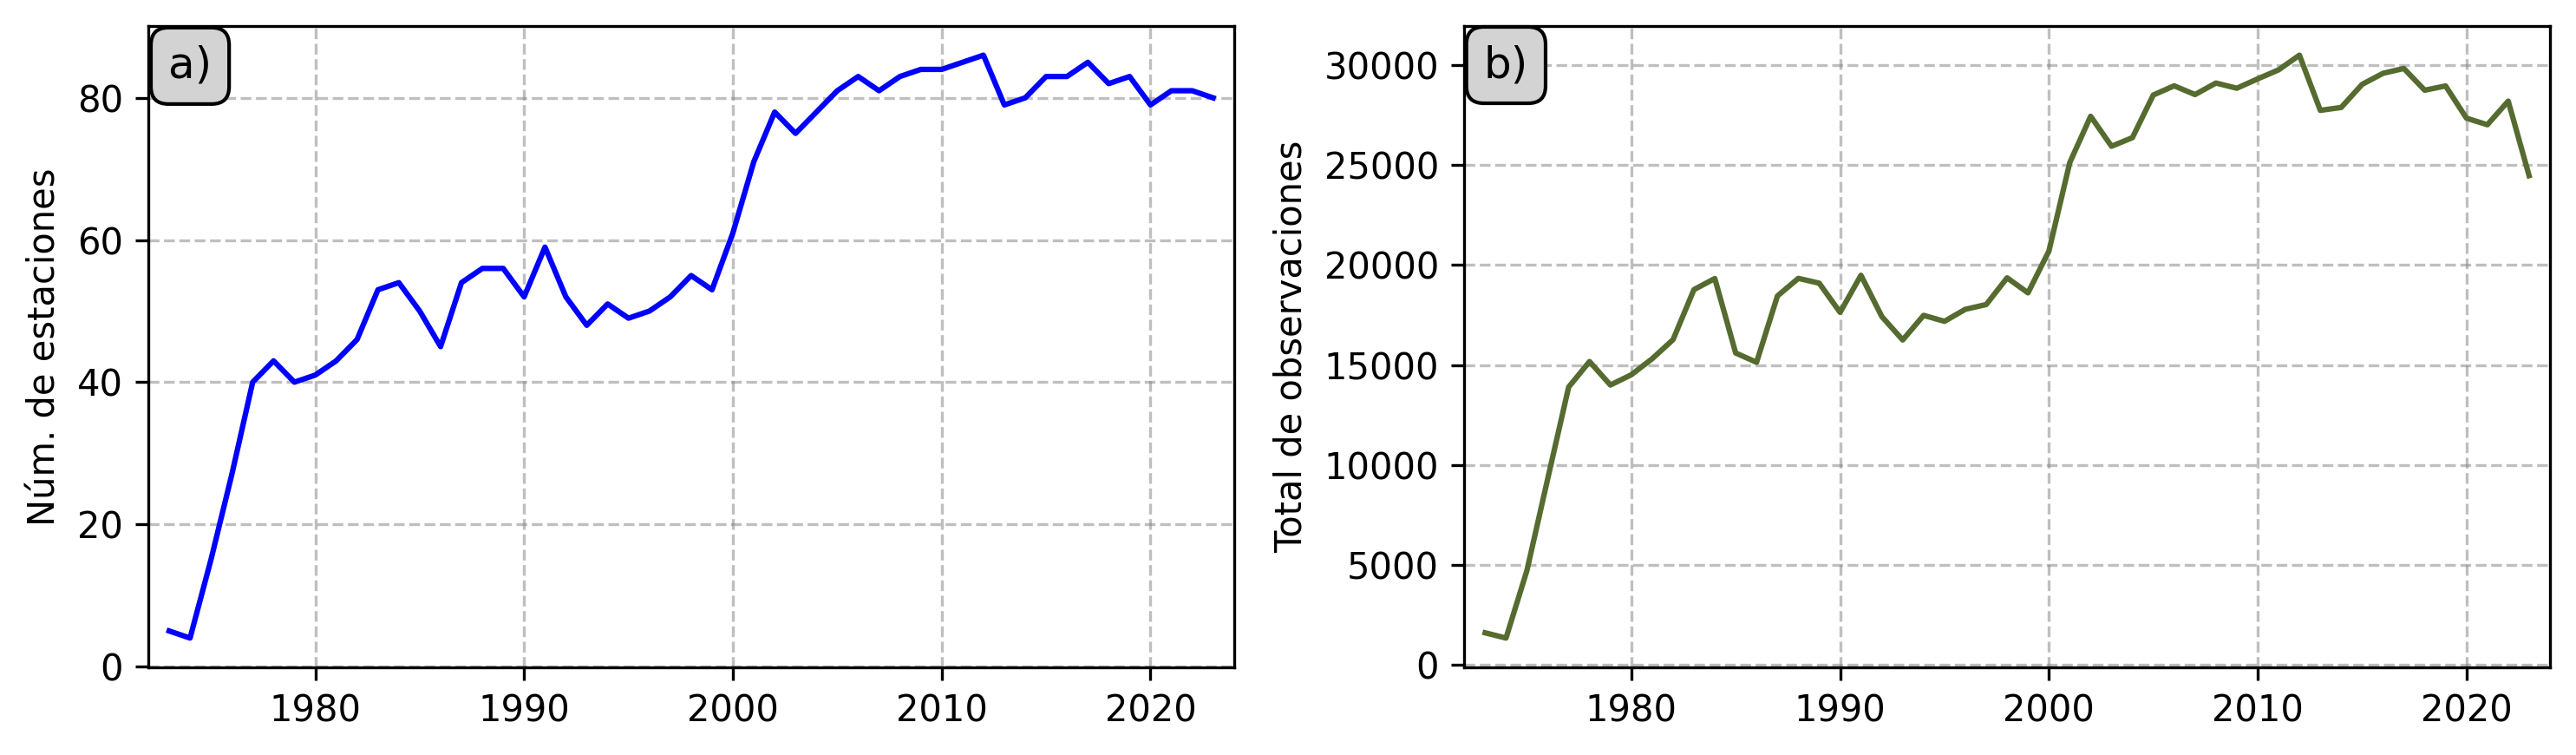

In [39]:
#Graficando el resultado
fig = plt.figure(figsize=(10,3),dpi=150)

plt.subplot(1,2,1)

plt.plot(np.unique(anios),cuenta,c="blue")
plt.grid(linestyle="--",c="gray",alpha=0.5)
plt.ylabel("Núm. de estaciones")
plt.xlim(1972,2024)
plt.text(1974, 84.5, "a)", fontsize=12, color="black", ha="center", va="center",
                 bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))#"Número de estaciones por año \n para las estaciones de HadISD")

plt.subplot(1,2,2)

plt.plot(np.unique(anios),observaciones.Twmin, c="#556B2F")
plt.grid(linestyle="--",c="gray",alpha=0.5)
plt.ylabel("Total de observaciones")
plt.xlim(1972,2024)
plt.text(1974, 30000, "b)", fontsize=12, color="black", ha="center", va="center",
                 bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4)) #Número de observaciones totales por año \n para las estaciones de HadISD"

plt.tight_layout()

plt.savefig("Observa_T.svg",bbox_inches="tight",dpi=150)
plt.savefig("Observa_T.png",bbox_inches="tight",dpi=150)